C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

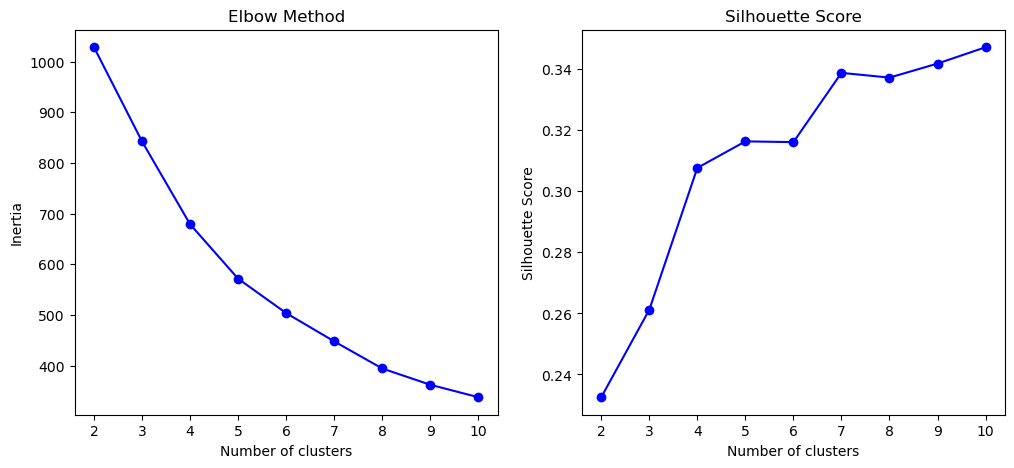

C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.2015796016297409
Silhouette Score: 0.3076784813987436


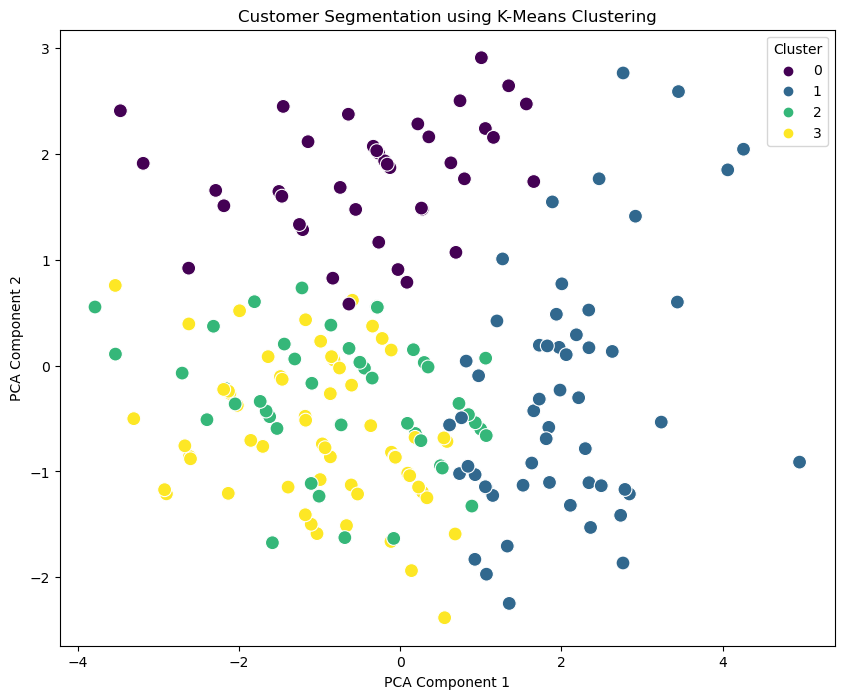

         TotalSpending  AvgTransactionValue  TransactionFrequency  \
Cluster                                                             
0          2784.740000           631.273182              4.589744   
1          5622.672963           764.755145              7.537037   
2          2958.413778           684.684352              4.288889   
3          2371.110492           657.397189              3.622951   

         UniqueProducts  Region_Europe  Region_North America  \
Cluster                                                        
0              4.589744       0.000000               1.00000   
1              7.185185       0.092593               0.12963   
2              4.222222       1.000000               0.00000   
3              3.557377       0.000000               0.00000   

         Region_South America      PCA1      PCA2  
Cluster                                            
0                    0.000000 -0.386116  1.775144  
1                    0.444444  2.027445 -0.2

C:\Users\sspon\AppData\Local\Temp\ipykernel_9008\3137624064.py:105: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = customers_df.groupby('Cluster').mean()


In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn 

In [54]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [55]:
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

In [56]:
total_spending = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

In [57]:
avg_transaction_value = merged_df.groupby('CustomerID')['TotalValue'].mean().reset_index()
avg_transaction_value.rename(columns={'TotalValue': 'AvgTransactionValue'}, inplace=True)

In [58]:
transaction_frequency = merged_df.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_frequency.rename(columns={'TransactionID': 'TransactionFrequency'}, inplace=True)

In [59]:
unique_products = merged_df.groupby('CustomerID')['ProductID'].nunique().reset_index()
unique_products.rename(columns={'ProductID': 'UniqueProducts'}, inplace=True)

In [60]:
customers_df = pd.merge(customers_df, total_spending, on='CustomerID')
customers_df = pd.merge(customers_df, avg_transaction_value, on='CustomerID')
customers_df = pd.merge(customers_df, transaction_frequency, on='CustomerID')
customers_df = pd.merge(customers_df, unique_products, on='CustomerID')
customers_df = pd.get_dummies(customers_df, columns=['Region'], drop_first=True)

In [73]:
customers_df.head()

,CustomerID,CustomerName,SignupDate,TotalSpending,AvgTransactionValue,TransactionFrequency,UniqueProducts,Region_Europe,Region_North America,Region_South America,Cluster,PCA1,PCA2
0,C0001,Lawrence Carroll,2022-07-10,3354.52,670.904,5,5,0,0,1,3,0.103040,-1.026035
1,C0002,Elizabeth Lutz,2022-02-13,1862.74,465.685,4,4,0,0,0,3,-1.174660,0.432437
2,C0003,Michael Rivera,2024-03-07,2725.38,681.345,4,4,0,0,1,3,-0.608600,-1.127669
3,C0004,Kathleen Rodriguez,2022-10-09,5354.88,669.360,8,8,0,0,1,1,2.295348,-0.784713
4,C0005,Laura Weber,2022-08-15,2034.24,678.080,3,3,0,0,0,3,-1.486507,-0.103530


In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers_df.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1))

In [62]:

inertia = []
silhouette_scores = []
K = range(2, 11)


In [63]:

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

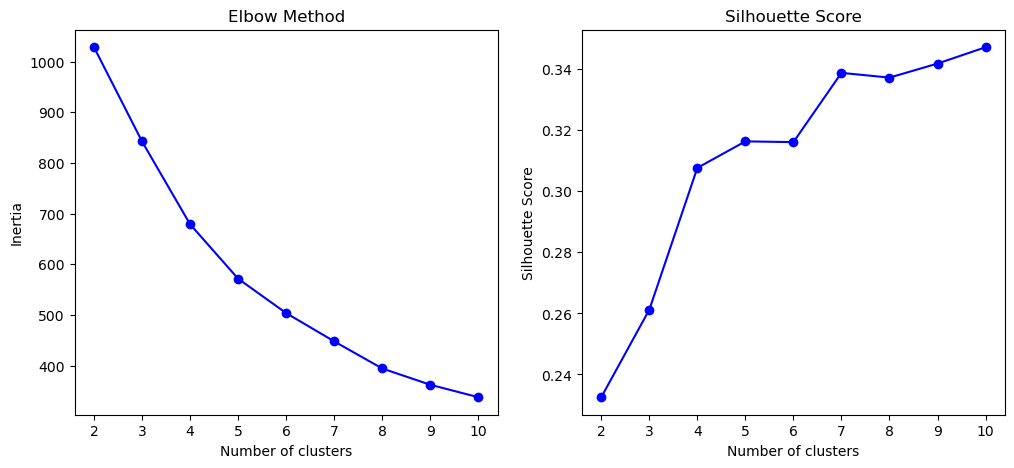

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [65]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)

C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sspon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [66]:
customers_df['Cluster'] = kmeans.labels_

In [67]:
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.2015796016297409


In [68]:
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3076784813987436


In [69]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customers_df['PCA1'] = pca_features[:, 0]
customers_df['PCA2'] = pca_features[:, 1]

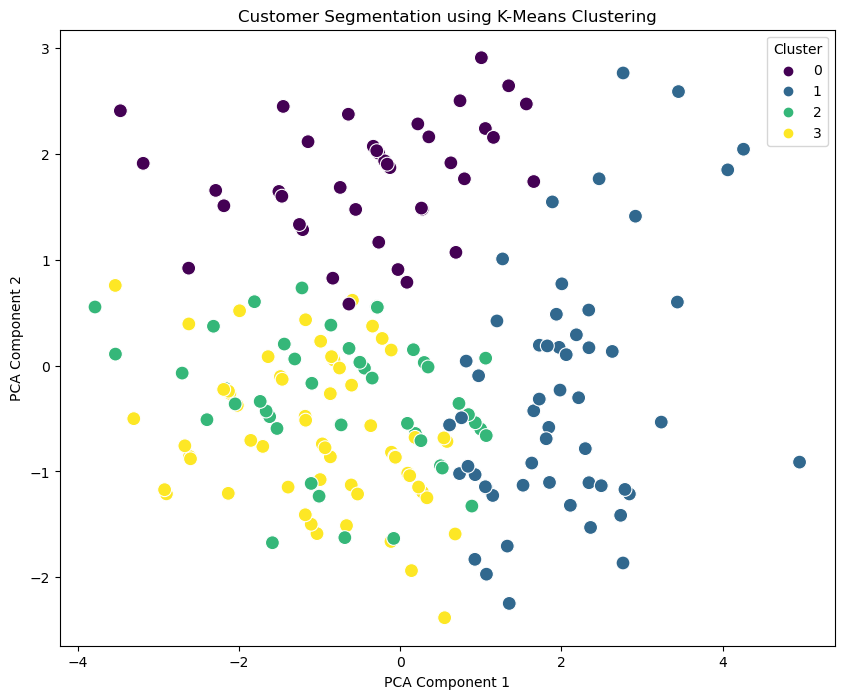

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customers_df, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [71]:
# Analyze the characteristics of each cluster
cluster_summary = customers_df.groupby('Cluster').mean()
print(cluster_summary)

         TotalSpending  AvgTransactionValue  TransactionFrequency  \
Cluster                                                             
0          2784.740000           631.273182              4.589744   
1          5622.672963           764.755145              7.537037   
2          2958.413778           684.684352              4.288889   
3          2371.110492           657.397189              3.622951   

         UniqueProducts  Region_Europe  Region_North America  \
Cluster                                                        
0              4.589744       0.000000               1.00000   
1              7.185185       0.092593               0.12963   
2              4.222222       1.000000               0.00000   
3              3.557377       0.000000               0.00000   

         Region_South America      PCA1      PCA2  
Cluster                                            
0                    0.000000 -0.386116  1.775144  
1                    0.444444  2.027445 -0.2

C:\Users\sspon\AppData\Local\Temp\ipykernel_9008\2638772776.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = customers_df.groupby('Cluster').mean()


In [74]:
cluster_summary

,TotalSpending,AvgTransactionValue,TransactionFrequency,UniqueProducts,Region_Europe,Region_North America,Region_South America,PCA1,PCA2
Cluster,,,,,,,,,
0,2784.740000,631.273182,4.589744,4.589744,0.000000,1.00000,0.000000,-0.386116,1.775144
1,5622.672963,764.755145,7.537037,7.185185,0.092593,0.12963,0.444444,2.027445,-0.278936
2,2958.413778,684.684352,4.288889,4.222222,1.000000,0.00000,0.000000,-0.729270,-0.331429
3,2371.110492,657.397189,3.622951,3.557377,0.000000,0.00000,0.573770,-1.009940,-0.643504
